In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium.plugins import HeatMap


df = pd.read_csv("/content/all_month.csv")

df.head()


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-06-05T09:16:03.063Z,36.7310,-116.3014,10.8000,0.0,ml,10.0,113.39,0.018,0.0726,...,2025-06-05T09:17:46.967Z,"45 km ESE of Beatty, Nevada",earthquake,NaN,1.200000,0.15,7.0,automatic,nn,nn
1,2025-06-05T09:13:43.905Z,65.2830,-149.0022,10.1000,0.8,ml,NaN,NaN,NaN,0.6100,...,2025-06-05T09:15:28.370Z,"21 km NE of Minto, Alaska",earthquake,NaN,0.700000,NaN,NaN,automatic,ak,ak
2,2025-06-05T09:01:13.378Z,38.8440,-118.7982,1.4000,2.0,ml,23.0,58.00,0.372,0.1595,...,2025-06-05T09:03:30.672Z,"11 km S of Schurz, Nevada",earthquake,NaN,3.100000,0.21,15.0,automatic,nn,nn
3,2025-06-05T08:32:10.943Z,64.8417,-147.4917,15.8000,1.0,ml,NaN,NaN,NaN,0.3500,...,2025-06-05T08:33:47.482Z,"5 km NNE of Badger, Alaska",earthquake,NaN,0.300000,NaN,NaN,automatic,ak,ak
4,2025-06-05T08:31:15.496Z,31.7110,-104.5120,4.6836,2.2,ml,29.0,94.00,0.000,0.5000,...,2025-06-05T08:35:33.699Z,"53 km SSW of Whites City, New Mexico",earthquake,0.0,1.132681,0.20,19.0,automatic,tx,tx


In [3]:
df['time'] = pd.to_datetime(df['time'])
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df.dropna(subset=['mag', 'latitude', 'longitude'], inplace=True)

In [8]:
#تحليل بصري
m = folium.Map(location=[0, 0], zoom_start=2)
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)
m

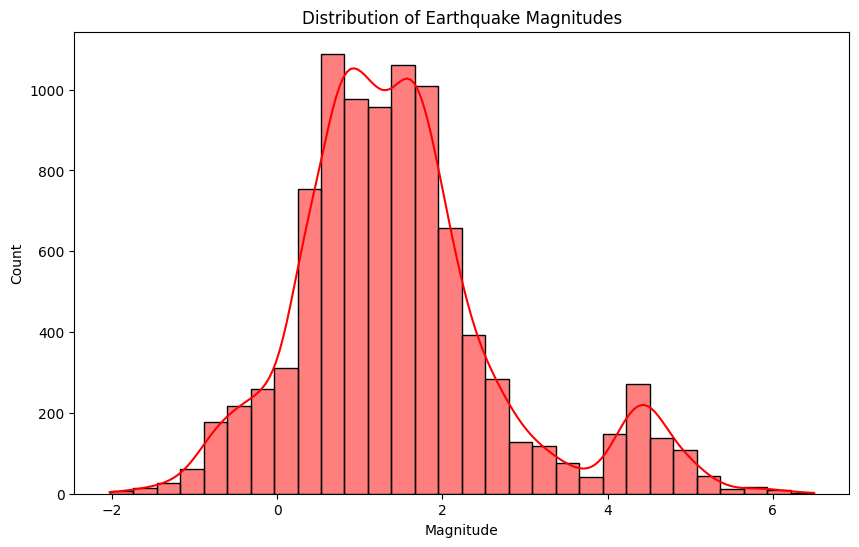

In [7]:
#توزيع قوة الزلازل
plt.figure(figsize=(10, 6))
sns.histplot(df['mag'], bins=30, kde=True, color='red')
plt.title("Distribution of Earthquake Magnitudes")
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.show()


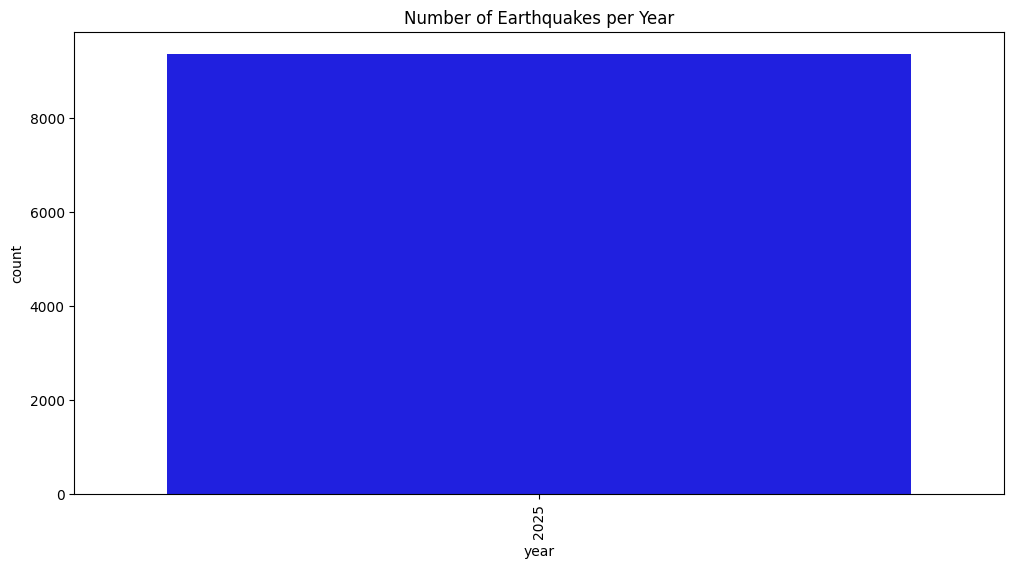

In [9]:
# عدد الزلازل سنويًا
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='year', color='blue')
plt.xticks(rotation=90)
plt.title("Number of Earthquakes per Year")
plt.show()


In [10]:
# أكثر السنوات نشاطًا
print("أكثر السنوات نشاطًا زلزاليًا:")
print(df['year'].value_counts().head(10).sort_index())

# أكثر الأماكن التي حدث بها زلازل
print("\nأكثر الأماكن التي حدثت فيها زلازل:")
print(df['place'].value_counts().head(10))


أكثر السنوات نشاطًا زلزاليًا:
year
2025    9366
Name: count, dtype: int64

أكثر الأماكن التي حدثت فيها زلازل:
place
7 km NW of The Geysers, CA     126
7 km WNW of Cobb, CA           112
63 km WNW of Tyonek, Alaska    100
8 km NW of Prague, Oklahoma     89
8 km NNW of The Geysers, CA     83
7 km NNW of The Geysers, CA     83
8 km WNW of Cobb, CA            76
6 km WNW of Cobb, CA            73
64 km WNW of Tyonek, Alaska     65
10 km NW of The Geysers, CA     64
Name: count, dtype: int64


In [11]:
# العلاقة بين العمق والقوة
correlation = df['depth'].corr(df['mag'])
print(f"\nالعلاقة بين العمق والقوة (correlation): {correlation:.3f}")


العلاقة بين العمق والقوة (correlation): 0.408
